This is the notebook from class on Feb 25, 2019, I'm putting in a few annotations here and there as well to remind you/me of what was going on at the time as well.

In [1]:
import nltk

At this point, we went off to https://childes.talkbank.org and looked at the browsable database, the content of the transcript files, the index to corpora that tells you a bit about each corpus, and eventually went to the XML version of the database, into the Eng-NA folder, and then downloaded Brown.zip, which is the corpus that contains Roger Brown's Adam, Eve, and Sarah data. I put the Brown.zip file in the same folder as this notebook, and unzipped it there, so that there is a folder called "Brown" that contains "Adam", "Eve", and "Sarah" folders.

Then, we bring the CHILDESCorpusReader in.

In [2]:
from nltk.corpus.reader import CHILDESCorpusReader

The following command sets up a corpus reader for all of the files that end in `xml` within the `Brown` folder.  The first argument is the base folder, and the second argument is the specification of the files we want the corpus reader to know about.

In [5]:
brown = CHILDESCorpusReader('Brown', '.*.xml')

In [6]:
brown.fileids()

['Adam/020304.xml',
 'Adam/020318.xml',
 'Adam/020403.xml',
 'Adam/020415.xml',
 'Adam/020430.xml',
 'Adam/020512.xml',
 'Adam/020603.xml',
 'Adam/020617.xml',
 'Adam/020701.xml',
 'Adam/020714.xml',
 'Adam/020801.xml',
 'Adam/020816.xml',
 'Adam/020904.xml',
 'Adam/020918.xml',
 'Adam/021002.xml',
 'Adam/021016.xml',
 'Adam/021030.xml',
 'Adam/021113.xml',
 'Adam/021128.xml',
 'Adam/030011.xml',
 'Adam/030025.xml',
 'Adam/030109.xml',
 'Adam/030126.xml',
 'Adam/030209.xml',
 'Adam/030221.xml',
 'Adam/030304.xml',
 'Adam/030318.xml',
 'Adam/030401.xml',
 'Adam/030418.xml',
 'Adam/030501.xml',
 'Adam/030515.xml',
 'Adam/030529.xml',
 'Adam/030609.xml',
 'Adam/030707.xml',
 'Adam/030801.xml',
 'Adam/030814.xml',
 'Adam/030826.xml',
 'Adam/030916.xml',
 'Adam/031015.xml',
 'Adam/031101.xml',
 'Adam/031114.xml',
 'Adam/040014.xml',
 'Adam/040115.xml',
 'Adam/040217.xml',
 'Adam/040309.xml',
 'Adam/040401.xml',
 'Adam/040413.xml',
 'Adam/040511.xml',
 'Adam/040624.xml',
 'Adam/040701.xml',


Now, we want to narrow our focus to just the Eve transcripts.  Looking above, we can see that they all start with `Eve` so, we can make a list using a list comprehension of all the files that start with `Eve`.

In [13]:
eve = [f for f in brown.fileids() if f[:3] == 'Eve']

To check this, we can look at the first four filenames, and it looks like it worked.

In [8]:
eve[:4]

['Eve/010600a.xml', 'Eve/010600b.xml', 'Eve/010700a.xml', 'Eve/010700b.xml']

The command below is just another way to do the same thing.  This one, instead of looking to see if the first three characters are `Eve` instead breaks the filename up at the `/` character, and then checks to see if the first bit before the first `/` is `Eve`.  The result is the same.

In [17]:
eve = [f for f in brown.fileids() if f.split('/')[0] == 'Eve']

In [18]:
eve[:4]

['Eve/010600a.xml', 'Eve/010600b.xml', 'Eve/010700a.xml', 'Eve/010700b.xml']

The next thing is (as a reminder) a way of getting a list of all the interesting things that this CHILDESCorpusReader knows how to do.  You could just look at `dir(brown)`, except this contains a bunch of internal things that are not useful, all of which start with `_`.  But it's easy enough to filter out all of those, like so:

In [21]:
[x for x in dir(brown) if x[:1] != '_']

['MLU',
 'abspath',
 'abspaths',
 'age',
 'childes_url_base',
 'citation',
 'convert_age',
 'corpus',
 'encoding',
 'ensure_loaded',
 'fileids',
 'license',
 'open',
 'participants',
 'raw',
 'readme',
 'root',
 'sents',
 'tagged_sents',
 'tagged_words',
 'unicode_repr',
 'webview_file',
 'words',
 'xml']

Another thing you can often do is use `help()` to get information about an object.

In [23]:
help(brown)

Help on CHILDESCorpusReader in module nltk.corpus.reader.childes object:

class CHILDESCorpusReader(nltk.corpus.reader.xmldocs.XMLCorpusReader)
 |  CHILDESCorpusReader(root, fileids, lazy=True)
 |  
 |  Corpus reader for the XML version of the CHILDES corpus.
 |  The CHILDES corpus is available at ``http://childes.psy.cmu.edu/``. The XML
 |  version of CHILDES is located at ``http://childes.psy.cmu.edu/data-xml/``.
 |  Copy the needed parts of the CHILDES XML corpus into the NLTK data directory
 |  (``nltk_data/corpora/CHILDES/``).
 |  
 |  For access to the file text use the usual nltk functions,
 |  ``words()``, ``sents()``, ``tagged_words()`` and ``tagged_sents()``.
 |  
 |  Method resolution order:
 |      CHILDESCorpusReader
 |      nltk.corpus.reader.xmldocs.XMLCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  MLU(self, fileids=None, speaker='CHI')
 |      :return: the given file(s) as a floating number
 |    

And, lastly, you can also check the real documentation if you want all of the unapologetically complex details. http://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.childes

So, let's get the MLU (mean length of utterance) for each of the files in the Eve corpus:

In [24]:
mlus = brown.MLU(eve)

In [25]:
mlus

[2.1007067137809186, 2.106824925816024, ...]

`MLU` assumes that the speaker you are focusing on is `CHI` (the child), but you can explicitly request focus on a different speaker.  Below, we get the MLUs for the mother, for comparison.

In [26]:
pmlus = brown.MLU(eve, speaker='MOT')

In [27]:
pmlus

[5.047457627118644, 5.715935334872979, ...]

Now a look at `tagged_words`, which are the words but annotated for grammatical information.  We'll look just at the first Eve file.

In [28]:
tws = brown.tagged_words(eve[0])

In [29]:
tws[:10]

[('more', 'qn'),
 ('cookie', 'n'),
 ('you', 'pro:per'),
 ('v', '0v'),
 ('more', 'qn'),
 ('cookies', 'n'),
 ('how_about', 'pro:int'),
 ('another', 'qn'),
 ('graham', 'n'),
 ('would', 'mod')]

So, it's a list of pairs.  The first element of each pair is the word, and the second element of each pair is the part of speech.  But what are the possible parts of speech?  Well, let's just see what all of them are.  We'll collect them in a list and then make a set out of that list so that we get just a collection of the unique parts of speech.

In [30]:
poses = set([p for (w,p) in tws])

In [31]:
poses

{'',
 '0v',
 'adj',
 'adv',
 'aux',
 'chi',
 'co',
 'conj',
 'coord',
 'cop',
 'cop~neg',
 'det:art',
 'det:dem',
 'det:num',
 'det:poss',
 'inf',
 'mod',
 'mod:aux',
 'mod~neg',
 'n',
 'n:gerund',
 'n:let',
 'n:prop',
 'n:prop~aux',
 'n:prop~cop',
 'n:prop~mod',
 'n:pt',
 'neg',
 'n~aux',
 'n~cop',
 'n~mod',
 'on',
 'part',
 'post',
 'prep',
 'pro:dem',
 'pro:dem~cop',
 'pro:exist',
 'pro:exist~aux',
 'pro:exist~cop',
 'pro:indef',
 'pro:int',
 'pro:int~aux',
 'pro:int~cop',
 'pro:int~mod',
 'pro:obj',
 'pro:per',
 'pro:per~aux',
 'pro:per~cop',
 'pro:per~mod',
 'pro:poss',
 'pro:rel',
 'pro:rel~aux',
 'pro:rel~cop',
 'pro:rel~mod',
 'pro:sub',
 'pro:sub~aux',
 'pro:sub~cop',
 'pro:sub~mod',
 'qn',
 'v',
 'v:obj~pro:obj'}

The point made by the thing below is that it provides the same result as the one just above, but it does so using a constructor rather than a list.  Above we build a list, and then make a set out of it.  Below, we give a constructor (instructions for building a list) directly to the `set()` function.  It doesn't matter much here, but the version below is slightly more efficient, since it doesn't need to build the list first.  Not super important, but maybe something you can file away in the back of your mind.

In [32]:
poses2 = set(p for (w,p) in tws)

In [33]:
poses2

{'',
 '0v',
 'adj',
 'adv',
 'aux',
 'chi',
 'co',
 'conj',
 'coord',
 'cop',
 'cop~neg',
 'det:art',
 'det:dem',
 'det:num',
 'det:poss',
 'inf',
 'mod',
 'mod:aux',
 'mod~neg',
 'n',
 'n:gerund',
 'n:let',
 'n:prop',
 'n:prop~aux',
 'n:prop~cop',
 'n:prop~mod',
 'n:pt',
 'neg',
 'n~aux',
 'n~cop',
 'n~mod',
 'on',
 'part',
 'post',
 'prep',
 'pro:dem',
 'pro:dem~cop',
 'pro:exist',
 'pro:exist~aux',
 'pro:exist~cop',
 'pro:indef',
 'pro:int',
 'pro:int~aux',
 'pro:int~cop',
 'pro:int~mod',
 'pro:obj',
 'pro:per',
 'pro:per~aux',
 'pro:per~cop',
 'pro:per~mod',
 'pro:poss',
 'pro:rel',
 'pro:rel~aux',
 'pro:rel~cop',
 'pro:rel~mod',
 'pro:sub',
 'pro:sub~aux',
 'pro:sub~cop',
 'pro:sub~mod',
 'qn',
 'v',
 'v:obj~pro:obj'}

Ok, plan now is to look at the noun:verb ratio, since we can at least identify nouns and verbs.  This is only really a rough cut, because it is mostly ignoring pronouns and some other things like "I'll".  First we make a list of the verbs in the first Eve transcript, by extracting just those things with category `'v'`.  The length of that list is the number of verbs it found.

In [34]:
vs = [w for (w,p) in brown.tagged_words(eve[0], speaker='CHI') if p == 'v']

In [35]:
len(vs)

126

Now, for the nouns.  Here, we want both `'n'` and anything that starts with `'n:'`.  (Note we don't want things that start with `'n'` only, though, because that would include "neg".)

In [36]:
ns = [w for (w,p) in brown.tagged_words(eve[0], speaker='CHI') if p[:2] == 'n:' or p == 'n']

In [37]:
len(ns)

540

Now, generalizing.  We define a function that will take a file and a speaker (if no speaker is specified, it will assume `CHI`), and compute the number of nouns, the number of verbs, the ratio, and return it.

In [39]:
def nvratio(f, sp='CHI'):
    ws = brown.tagged_words(f, speaker=sp)
    vs = [w for (w,p) in ws if p == 'v']
    ns = [w for (w,p) in ws if p[:2] == 'n:' or p == 'n']
    nns = len(ns)
    nvs = len(vs)
    ratio = nns/nvs
    return ratio

In [40]:
nvratio(eve[0])

4.285714285714286

We can also use the `age()` function that the CHILDESCorpusReader object provides, to get the age for each file.  The `month=True` part means that it will give us the result in months.  This is going to serve as the x-axis on a plot we will do shortly.

In [42]:
age_months = [brown.age(f, month=True) for f in eve]

In [43]:
age_months

[[18],
 [18],
 [19],
 [19],
 [20],
 [21],
 [21],
 [21],
 [22],
 [22],
 [23],
 [23],
 [24],
 [24],
 [25],
 [25],
 [26],
 [26],
 [27],
 [27]]

Now, we define the N:V ratio of the child for each transcript as `eve_rat` and of the mother as `mot_rat`.  Looking at the first file shows a fairly wide difference.

In [44]:
eve_rat = [nvratio(f) for f in eve]

In [45]:
mot_rat = [nvratio(f, sp='MOT') for f in eve]

In [46]:
eve_rat[0]

4.285714285714286

In [47]:
mot_rat[0]

1.434065934065934

And now, we plot.  The first step is to import `pyplot` and because we will be referring to this a lot, we give it a shorter name, `plt`.

In [48]:
from matplotlib import pyplot as plt

The bit below was built up incrementally, but shows a lot of common things you might like to do.  The first line that includes `figsize=(10,10)` can determine how big the resulting figure is.  It's nice to be able to make them bigger.  Also, doing this allows at the end to do `fig.savefig()` to save the graphics to a file.  If you say `.pdf` at the end of the filename it will save as a PDF, if you say `.jpg` at the end of the filename it will save as a JPG, etc.

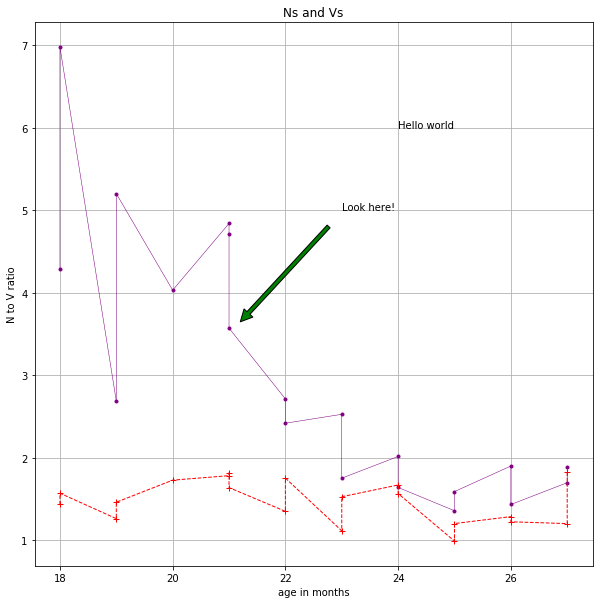

In [57]:
fig = plt.figure(figsize=(10,10))
eve_lines = plt.plot(age_months, eve_rat, color='purple')
mot_lines = plt.plot(age_months, mot_rat, color='red')
plt.setp(eve_lines, linewidth=0.5, marker='.', linestyle='-')
plt.setp(mot_lines, linewidth=1, marker='+', linestyle='--')
plt.xlabel('age in months')
plt.ylabel('N to V ratio')
plt.title('Ns and Vs')
plt.annotate('Look here!', xy=(21, 3.5), xytext=(23, 5),
            arrowprops=dict(facecolor="green", shrink=0.1))
plt.text(24, 6, "Hello world")
plt.grid(True)
fig.savefig('childes_test_fig.pdf');

This last part, as we were running low on time, takes a quick tour through making a word cloud.  Now, the problem here is that you need to install something first, because it is not installed by default.  The way you install it (at least on my Mac, but this is fairly general across platforms) is to say: `!pip install wordcloud` -- the `!` means that this is not for Python but rather for the underlying operating system, `pip` is the general Python library management program, `install` is what we are asking it to do, and `wordcloud` is the library we are asking it to operate on.  It should Just Work, one hopes.

Also note: You only need to install it once.  After it is installed, you can skip this step in the future.

In [62]:
!pip install wordcloud

Now, some words to cloud.  We'll take the words from Eve's first file.

In [67]:
some_words = brown.words(eve[0])

In [68]:
some_words[:5]

['more', 'cookie', 'you', 'v', 'more']

And we will compute a frequency distribution to count what words are used how often.

In [64]:
fd = nltk.FreqDist(some_words)

Make Python aware of WordCloud

In [70]:
from wordcloud import WordCloud

And then generate a word 

In [65]:
wc = WordCloud().generate_from_frequencies(fd)

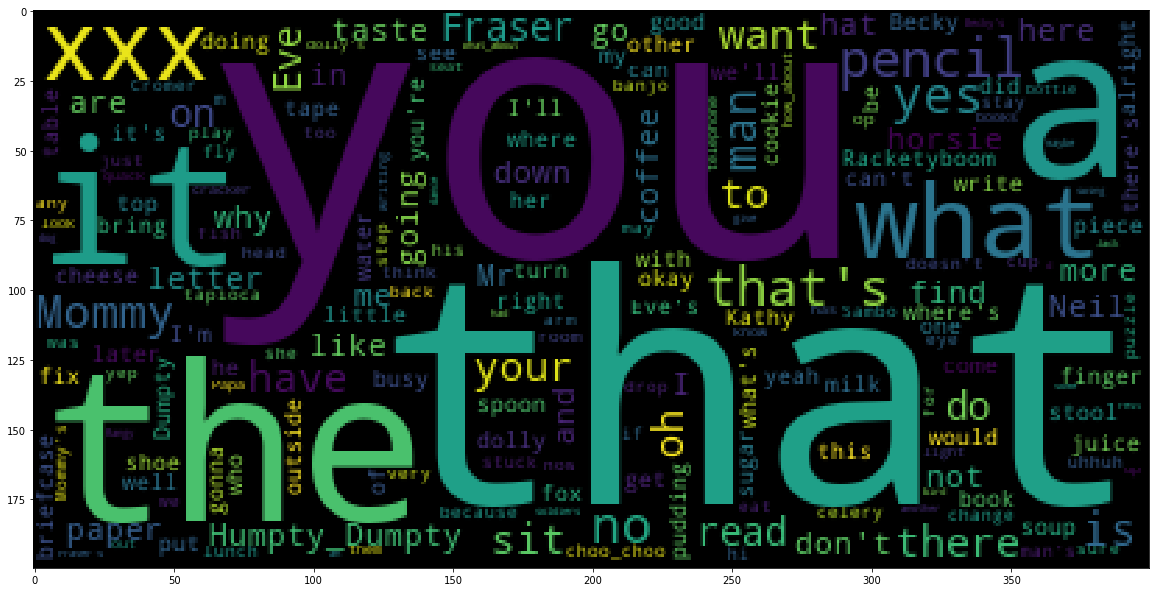

In [66]:
fig = plt.figure(figsize=(20,20))
plt.imshow(wc)
fig.savefig('childes_all_words_wc.pdf');